In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
a=input("Enter name: ")
b="C:\\Users\\Rapid\\Desktop\\stock\\datasets\\AXISBANK.CSV"
df= pd.read_csv(b)
df = df[df['Symbol'] == a]
df.head()

Enter name: AXISBANK


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1912,2007-08-16,AXISBANK,EQ,597.50,588.00,594.9,551.00,558.0,557.85,564.61,860905,4.860747e+13,NaN,611675.0,0.7105
1913,2007-08-17,AXISBANK,EQ,557.85,546.05,581.0,534.00,577.0,575.15,560.10,1338154,7.494968e+13,NaN,766322.0,0.5727
1914,2007-08-20,AXISBANK,EQ,575.15,585.00,609.0,577.00,603.5,604.65,593.44,878025,5.210585e+13,NaN,550878.0,0.6274
1915,2007-08-21,AXISBANK,EQ,604.65,613.90,613.9,587.00,587.0,590.90,599.01,441898,2.647025e+13,NaN,244937.0,0.5543
1916,2007-08-22,AXISBANK,EQ,590.90,592.00,599.7,561.15,584.0,582.55,578.25,551499,3.189036e+13,NaN,307484.0,0.5575


In [6]:
df.shape

(5306, 15)

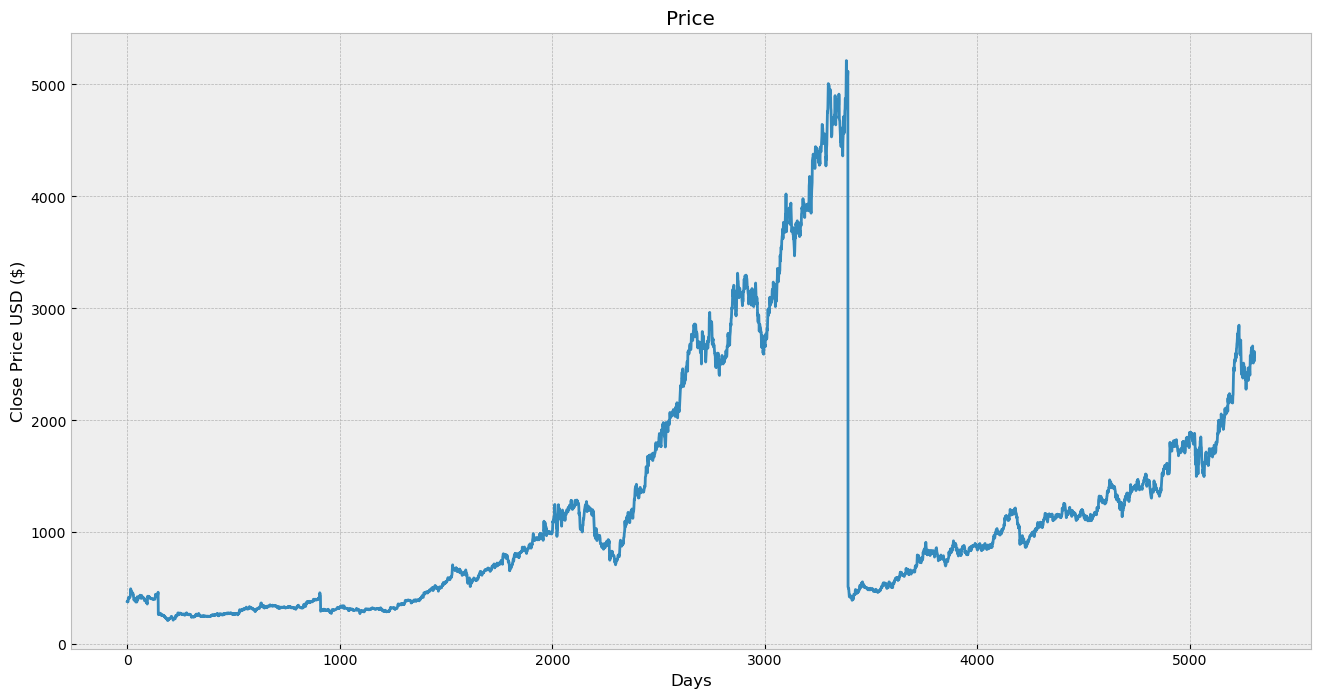

In [7]:
plt.figure(figsize=(16,8))
plt.title('Price')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [80]:
df= df[['Close']]
df.head(4)

,Close
3322,381.65
3323,385.55
3324,383.00
3325,377.50


In [81]:
future_days=100
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
8624,2574.35,NaN
8625,2614.55,NaN
8626,2613.45,NaN
8627,2536.40,NaN


In [82]:
x=np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

[[ 381.65]
 [ 385.55]
 [ 383.  ]
 ...
 [2215.3 ]
 [2230.05]
 [2315.85]]


C:\Users\Rapid\AppData\Local\Temp\ipykernel_7764\1603995368.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop(['Prediction'],1))[:-future_days]


In [83]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 420.6   426.15  426.25 ... 2614.55 2613.45 2536.4 ]


In [84]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [85]:
tree= DecisionTreeRegressor().fit(x_train,y_train)
lr= LinearRegression().fit(x_train,y_train)

In [86]:
x_future= df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

C:\Users\Rapid\AppData\Local\Temp\ipykernel_7764\2102906207.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future= df.drop(['Prediction'],1)[:-future_days]


array([[1688.4 ],
       [1671.65],
       [1693.2 ],
       [1717.9 ],
       [1751.6 ],
       [1724.25],
       [1695.75],
       [1727.8 ],
       [1712.05],
       [1778.15],
       [1759.65],
       [1740.15],
       [1743.35],
       [1715.5 ],
       [1705.5 ],
       [1713.95],
       [1716.3 ],
       [1727.55],
       [1806.25],
       [1782.35],
       [1789.55],
       [1797.25],
       [1802.55],
       [1802.55],
       [1836.7 ],
       [1874.1 ],
       [1885.7 ],
       [1874.9 ],
       [1958.  ],
       [1962.15],
       [2000.6 ],
       [1971.4 ],
       [1982.5 ],
       [1958.1 ],
       [1899.1 ],
       [1979.3 ],
       [1943.95],
       [1978.  ],
       [1956.35],
       [1982.1 ],
       [1960.35],
       [1979.05],
       [2056.55],
       [2035.95],
       [2031.2 ],
       [2017.55],
       [2012.1 ],
       [2007.95],
       [2028.4 ],
       [1972.55],
       [1937.5 ],
       [1946.55],
       [1918.35],
       [1925.6 ],
       [1945.6 ],
       [19

In [87]:
tree_prediction =tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2411.4   2033.7   2118.5   2438.9   2522.3   2526.05  2520.95  2548.15
 2112.95  1552.95  2575.05  2601.5   2554.65  2600.8   2642.55  2648.25
 2099.9   2696.8   2734.4   2764.5   2079.85  2100.3   2793.85  2793.85
 2792.25  2844.7   1751.6   2720.55  2441.7   2652.475 2590.9   2661.7
 2645.05  2441.7   2600.8   2596.65  2598.25  2436.6   2441.7   2407.35
 2387.05  2463.65  2453.65  2401.8   2376.75  2416.85  2506.85  2510.6
 2505.5   2661.7   2456.75  2450.25  2388.15  2470.75  2450.25  2387.05
 2372.2   2361.35  2373.75  2277.2   2362.3   2390.4   2836.    2417.1
 2387.1   2382.7   2277.2   2431.95  2401.35  2355.    2623.6   2422.95
 2355.    2635.35  2628.6   2571.9   2611.6   2402.2   2505.15  2578.05
 2537.4   2551.75  2510.65  2611.6   2628.6   2650.65  2505.15  2650.65
 2511.25  2587.7   2663.7   2571.9   2537.4   2511.25  2517.95  2578.05
 2574.35  2614.55  2613.45  2536.4  ]

[1652.42935433 1638.5156413  1656.41656761 1676.93410264 1704.92766258
 1682.20885355 1658.53477467 

C:\Users\Rapid\AppData\Local\Temp\ipykernel_7764\2687581824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


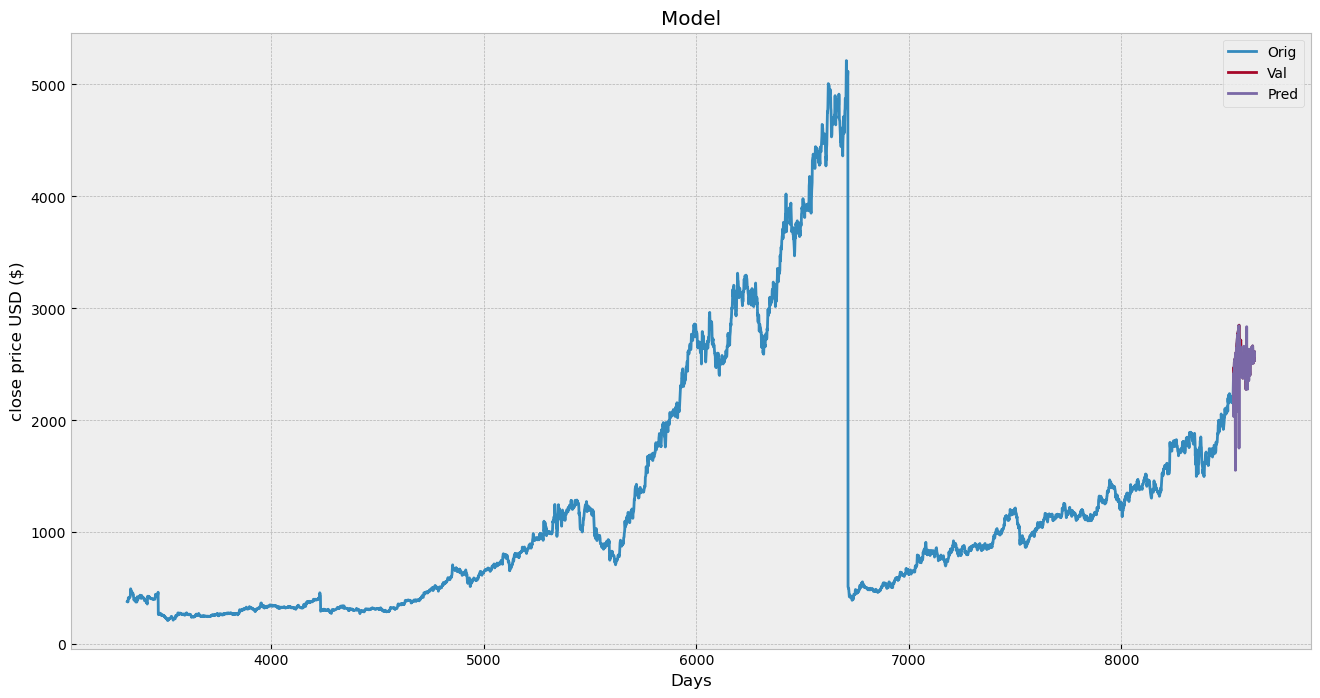

In [88]:
predictions= tree_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

C:\Users\Rapid\AppData\Local\Temp\ipykernel_7764\3375756948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


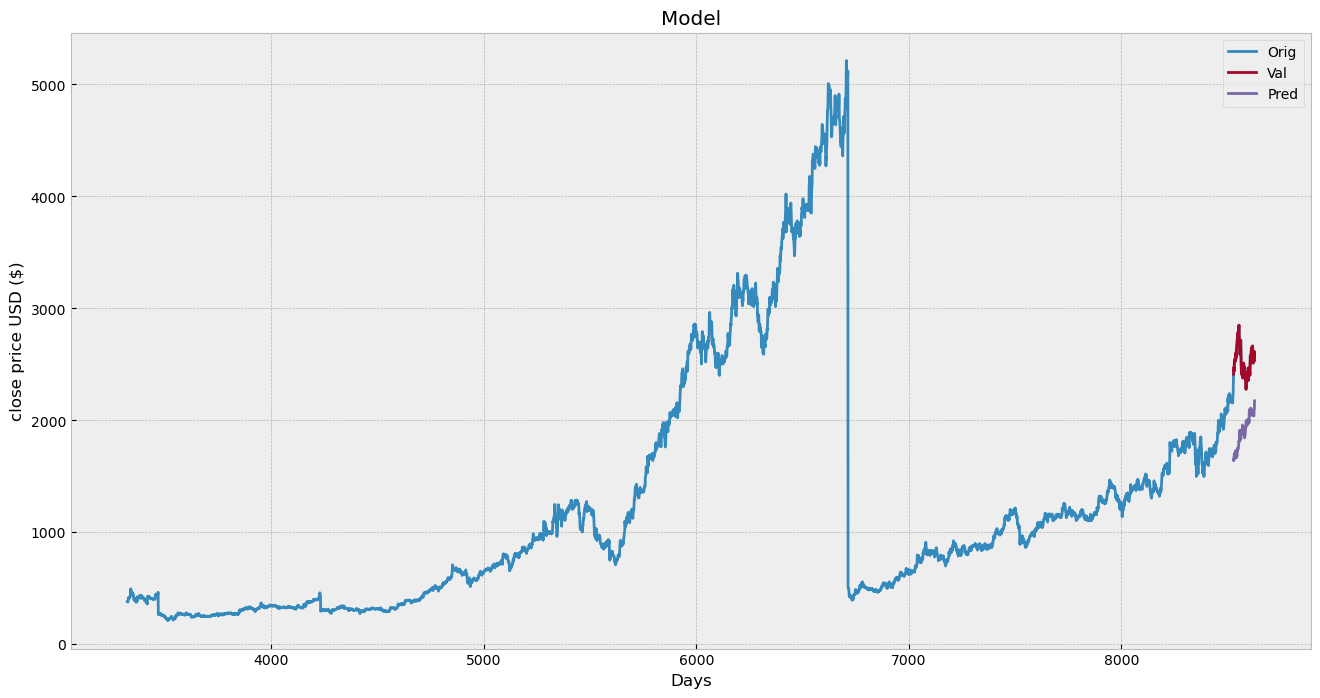

In [89]:
predictions= lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()